In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 
from tabulate import tabulate               
import matplotlib as mat

In [2]:
income_data = pd.read_excel("DS1_C5_S2_Income_Data_Challenge.xlsx")
income_data

Age   WorkClass    Education  Education_Num       Marital_Status  \
0       39   State-gov    Bachelors             13        Never-married   
1       50    Self-emp    Bachelors             13   Married-civ-spouse   
2       38     Private      HS-grad              9             Divorced   
3       53     Private         11th              7   Married-civ-spouse   
4       28     Private    Bachelors             13   Married-civ-spouse   
...    ...         ...          ...            ...                  ...   
32556   27     Private   Assoc-acdm             12   Married-civ-spouse   
32557   40     Private      HS-grad              9   Married-civ-spouse   
32558   58     Private      HS-grad              9              Widowed   
32559   22     Private      HS-grad              9        Never-married   
32560   52    Self-emp      HS-grad              9   Married-civ-spouse   

               Occupation    Relationship   Gender  Hours_Per_Week  \
0            Adm-clerical   Not-in-family     Male              40   
1         Exec-managerial         Husband     Male              13   
2       Handlers-cleaners   Not-in-family     Male              40   
3       Handlers-cleaners         Husband     Male              40   
4          Prof-specialty            Wife   Female              40   
...                   ...             ...      ...             ...   
32556        Tech-support            Wife   Female              38   
32557   Machine-op-inspct         Husband     Male              40   
32558        Adm-clerical       Unmarried   Female              40   
32559        Adm-clerical       Own-child     Male              20   
32560     Exec-managerial            Wife   Female              40   

       Native_Country Income_Bracket  
0       United-States          <=50K  
1       United-States          <=50K  
2       United-States          <=50K  
3       United-States          <=50K  
4                Cuba          <=50K  
...               ...            ...  
32556   United-States          <=50K  
32557   United-States           >50K  
32558   United-States          <=50K  
32559   United-States          <=50K  
32560   United-States           >50K  

[32561 rows x 11 columns]

In [92]:
income_data.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [4]:
#displaying nunique for taking tyhis as a parameter in determining datatypes


income_data.nunique()

Age               73
WorkClass          9
Education         16
Education_Num     16
Marital_Status     7
Occupation        15
Relationship       6
Gender             2
Hours_Per_Week    94
Native_Country    42
Income_Bracket     2
dtype: int64

TASK 1

In [8]:
def seprate_data_types(income_data):
    categorical = []
    continuous = []
    for column in income_data.columns:                
        if income_data[column].nunique() < 43:       
                                                    
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(income_data)         


from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  --------------
WorkClass       Age
Education       Hours_Per_Week
Education_Num
Marital_Status
Occupation
Relationship
Gender
Native_Country
Income_Bracket


In [32]:
##TASK 2.1

##relationship of education with Job Income Bracket

edu = income_data[["Education","Income_Bracket"]]
edu

Education Income_Bracket
0        Bachelors          <=50K
1        Bachelors          <=50K
2          HS-grad          <=50K
3             11th          <=50K
4        Bachelors          <=50K
...            ...            ...
32556   Assoc-acdm          <=50K
32557      HS-grad           >50K
32558      HS-grad          <=50K
32559      HS-grad          <=50K
32560      HS-grad           >50K

[32561 rows x 2 columns]

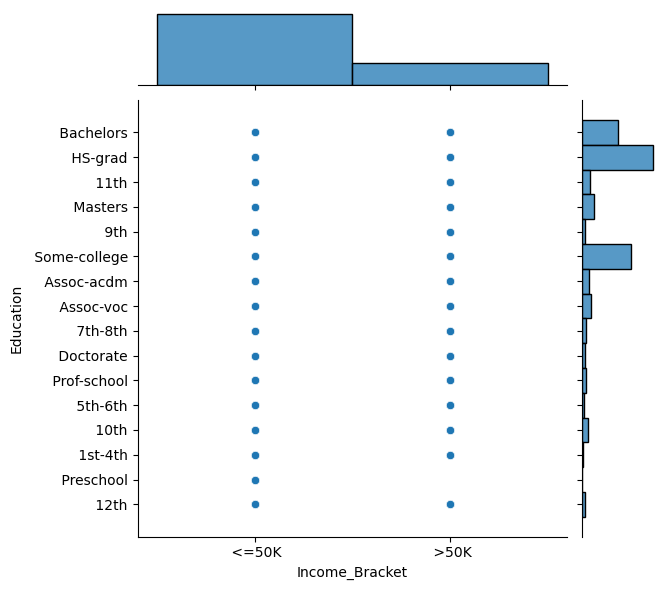

In [99]:
##bivariate analysis

sns.jointplot(y= 'Education', x= 'Income_Bracket', data = income_data)

INTERPRETATION : most of the people's income is less than or equal to 50k and they belong to HS-Grad.

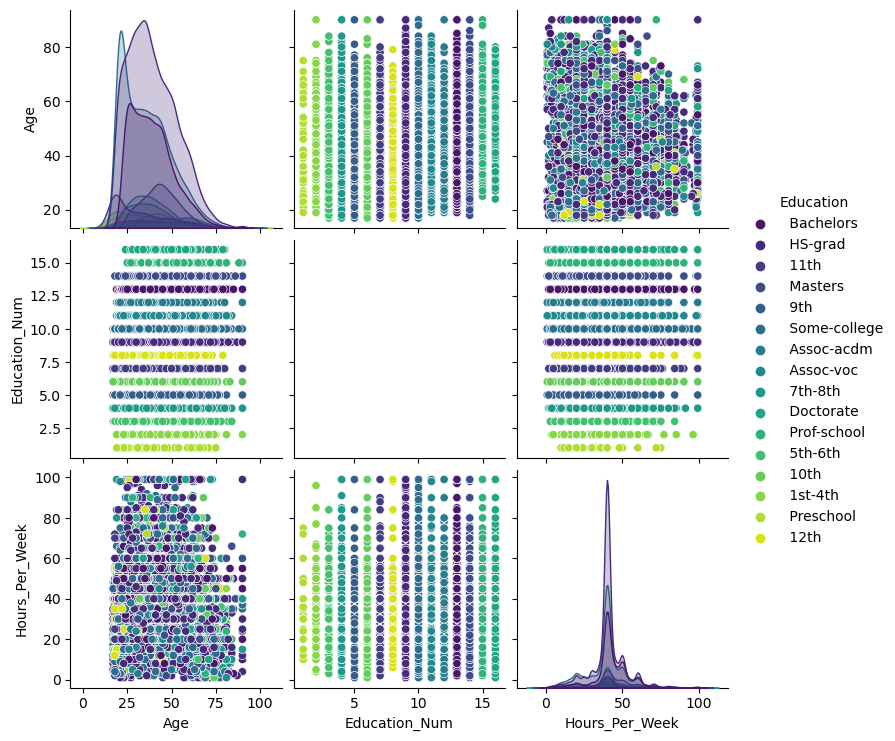

In [83]:
##multivariate analysis

sns.pairplot(income_data, hue = 'Education', palette = 'viridis')

In [61]:
##TASK 2.2

##relationship of gender with Job Income Bracket

gender = income_data[["Gender","Income_Bracket"]]
gender

Gender Income_Bracket
0         Male          <=50K
1         Male          <=50K
2         Male          <=50K
3         Male          <=50K
4       Female          <=50K
...        ...            ...
32556   Female          <=50K
32557     Male           >50K
32558   Female          <=50K
32559     Male          <=50K
32560   Female           >50K

[32561 rows x 2 columns]

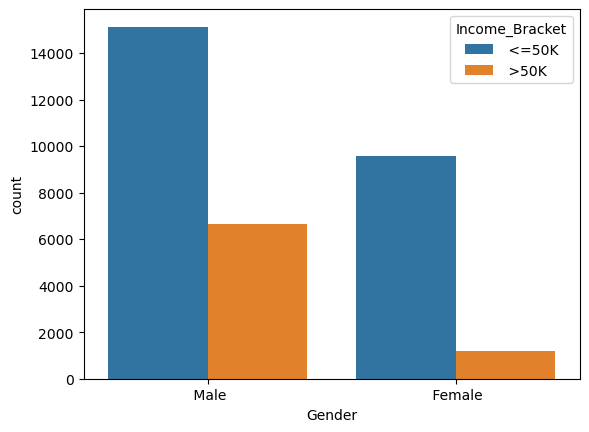

In [63]:
##bivariate analysis

ax = sns.countplot(x=gender["Gender"],hue= gender["Income_Bracket"])

INTERPRETATION : most of the people who got income equal to less than 50k are Males.

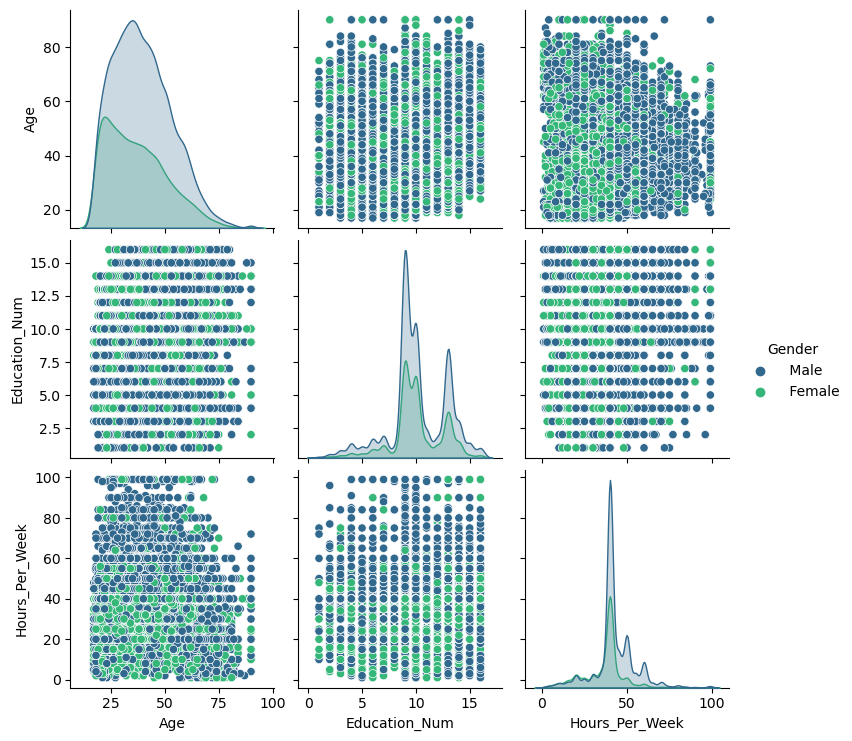

In [84]:
##Multivariate analysis

sns.pairplot(income_data, hue = 'Gender', palette = 'viridis');

In [41]:
##TASK 2.3

##relationship of native country with Job Income Bracket

native = income_data[["Native_Country","Income_Bracket"]]
native

Native_Country Income_Bracket
0       United-States          <=50K
1       United-States          <=50K
2       United-States          <=50K
3       United-States          <=50K
4                Cuba          <=50K
...               ...            ...
32556   United-States          <=50K
32557   United-States           >50K
32558   United-States          <=50K
32559   United-States          <=50K
32560   United-States           >50K

[32561 rows x 2 columns]

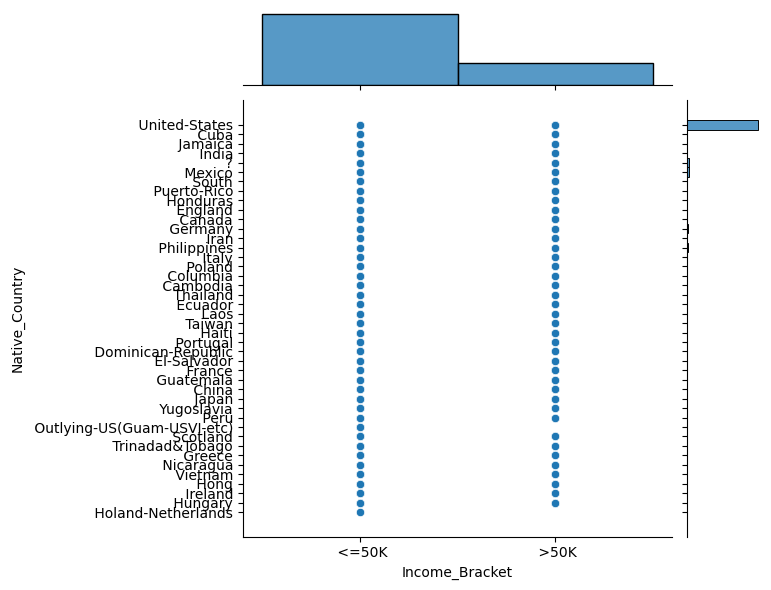

In [100]:
#3bivariate analysis

sns.jointplot(y= 'Native_Country', x= 'Income_Bracket', data = income_data)

INTERPRETATION : most of the people's income is equal to less than 50k and they are from United States.

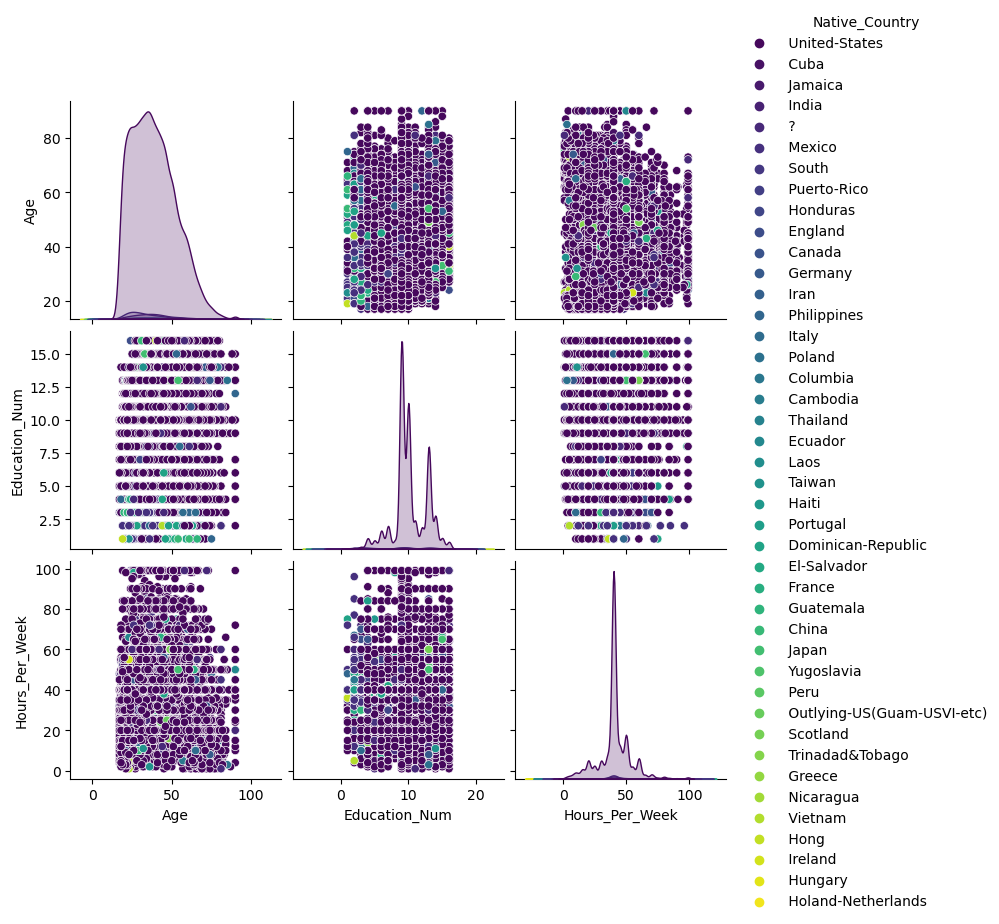

In [85]:
##multivariate analysis

sns.pairplot(income_data, hue = 'Native_Country', palette = 'viridis');

In [49]:
##TASK 2.4

##relationship of Relationship with Job Income Bracket

rel = income_data[["Relationship","Income_Bracket"]]
rel

Relationship Income_Bracket
0       Not-in-family          <=50K
1             Husband          <=50K
2       Not-in-family          <=50K
3             Husband          <=50K
4                Wife          <=50K
...               ...            ...
32556            Wife          <=50K
32557         Husband           >50K
32558       Unmarried          <=50K
32559       Own-child          <=50K
32560            Wife           >50K

[32561 rows x 2 columns]

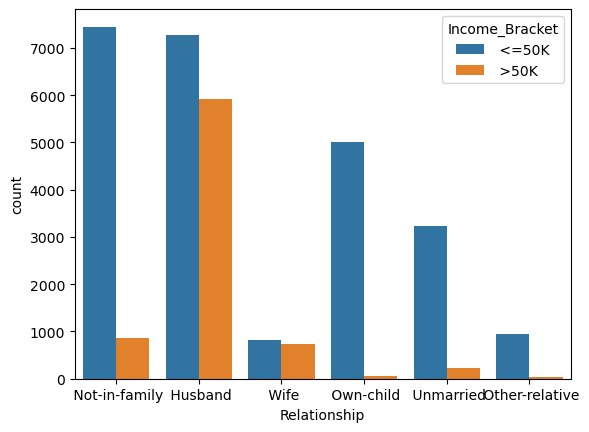

In [51]:
##bivariate analysis

ax = sns.countplot(x=rel["Relationship"],hue=rel["Income_Bracket"])

INTERPRETATION : most of the people who got income equal to less than 50k are not in any family or a husband.

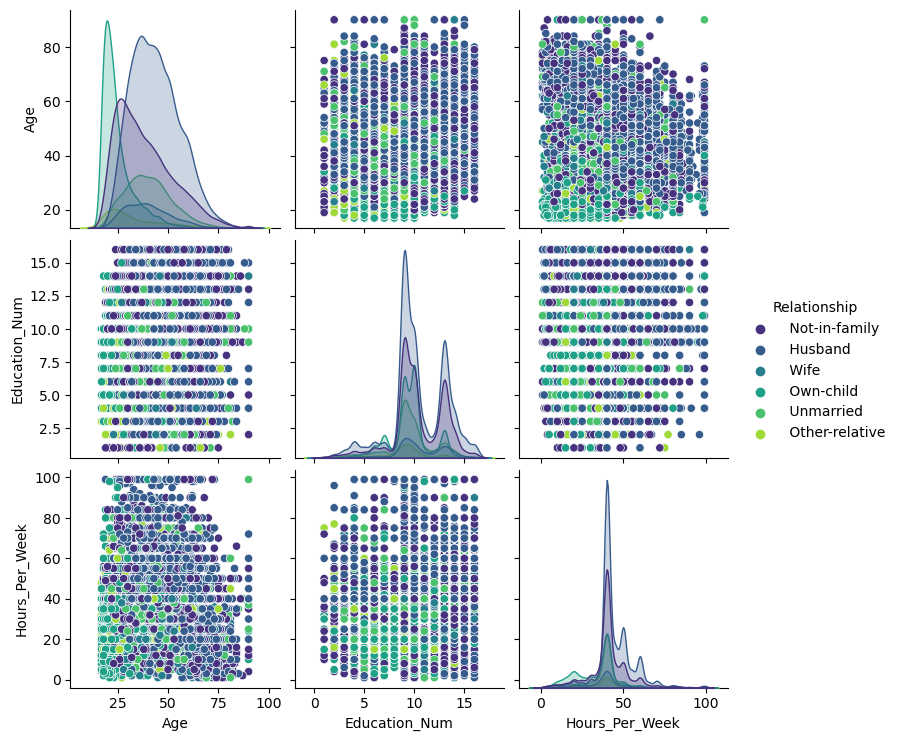

In [86]:
##multivariate analysis

sns.pairplot(income_data, hue = 'Relationship', palette = 'viridis');

In [47]:
##TASK 2.5

##relationship of Occupation with Job Income Bracket

occ = income_data[["Occupation","Income_Bracket"]]
occ

Occupation Income_Bracket
0            Adm-clerical          <=50K
1         Exec-managerial          <=50K
2       Handlers-cleaners          <=50K
3       Handlers-cleaners          <=50K
4          Prof-specialty          <=50K
...                   ...            ...
32556        Tech-support          <=50K
32557   Machine-op-inspct           >50K
32558        Adm-clerical          <=50K
32559        Adm-clerical          <=50K
32560     Exec-managerial           >50K

[32561 rows x 2 columns]

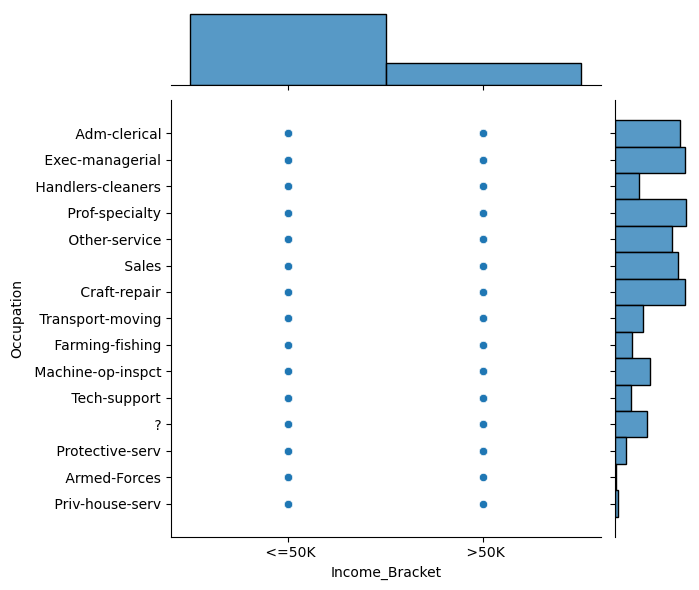

In [101]:
##bivariate analysis

sns.jointplot(y= 'Occupation', x= 'Income_Bracket', data = income_data)

INTERPRETATION : most of the people who got income equal to less than 50k are from Adm-Clerical,Other Service,exec manageril or Craft Repair

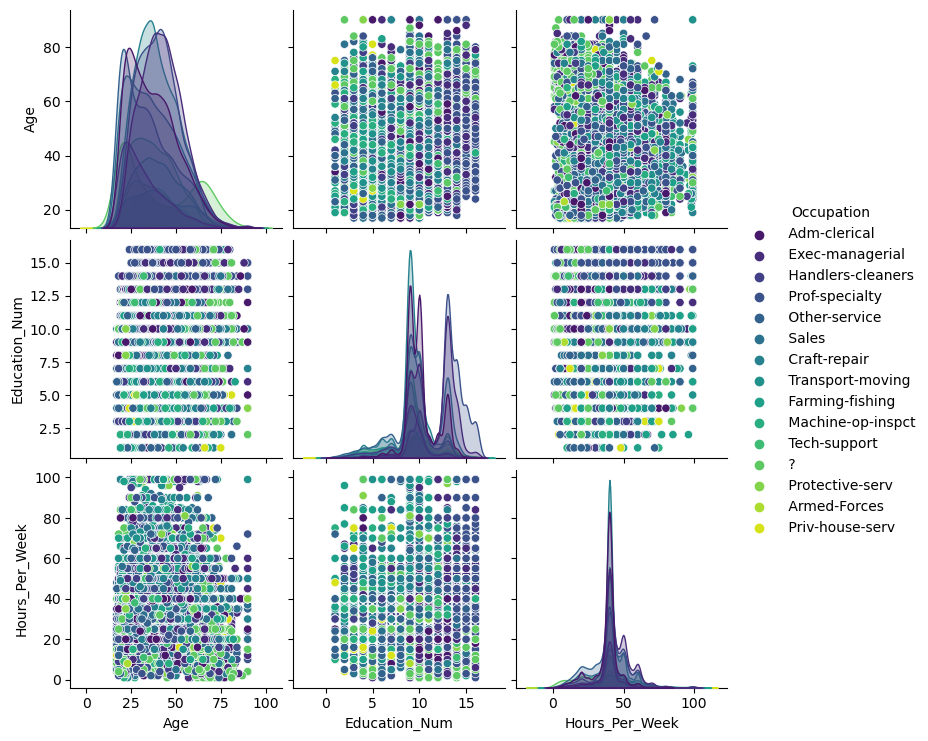

In [87]:
##multivariate analysis

sns.pairplot(income_data, hue = 'Occupation', palette = 'viridis');

In [55]:
##TASK 2.6

##relationship of Marital_Status with Job Income Bracket

mar = income_data[["Marital_Status","Income_Bracket"]]
mar

Marital_Status Income_Bracket
0            Never-married          <=50K
1       Married-civ-spouse          <=50K
2                 Divorced          <=50K
3       Married-civ-spouse          <=50K
4       Married-civ-spouse          <=50K
...                    ...            ...
32556   Married-civ-spouse          <=50K
32557   Married-civ-spouse           >50K
32558              Widowed          <=50K
32559        Never-married          <=50K
32560   Married-civ-spouse           >50K

[32561 rows x 2 columns]

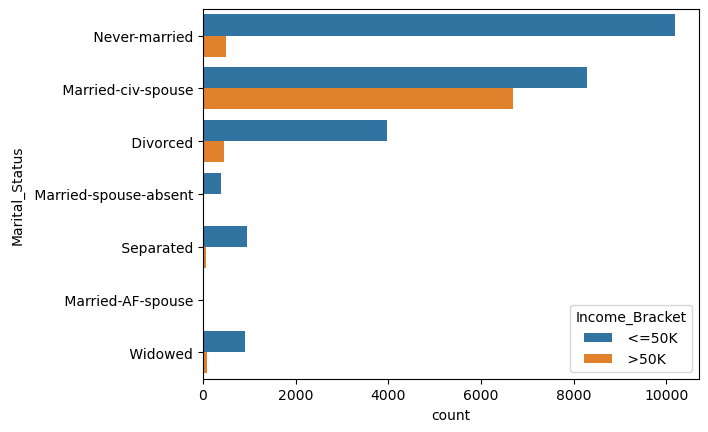

In [57]:
##bivariate analysis

ax = sns.countplot(y=mar["Marital_Status"],hue=mar["Income_Bracket"])

INTERPRETATION : most of the people who got income equal to less than 50k are never married or married civ-spouse.

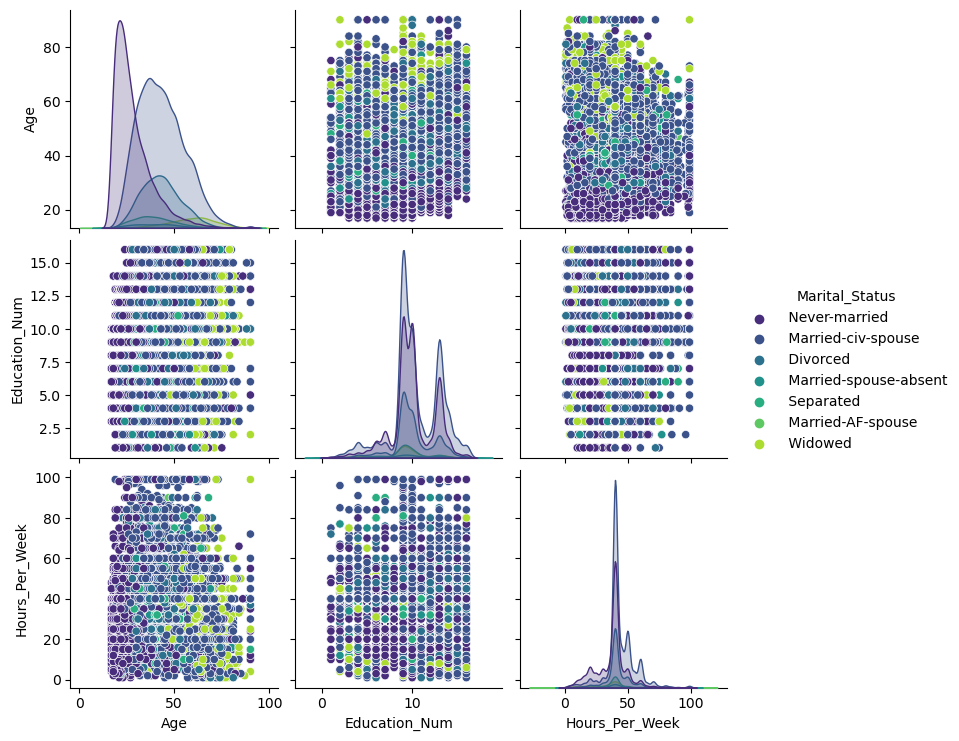

In [93]:
##multivariate analysis

sns.pairplot(income_data, hue = 'Marital_Status', palette = 'viridis');

In [59]:
##TASK 2.7

##relationship of WorkClass with Job Income Bracket

work = income_data[["WorkClass","Income_Bracket"]]
work

WorkClass Income_Bracket
0       State-gov          <=50K
1        Self-emp          <=50K
2         Private          <=50K
3         Private          <=50K
4         Private          <=50K
...           ...            ...
32556     Private          <=50K
32557     Private           >50K
32558     Private          <=50K
32559     Private          <=50K
32560    Self-emp           >50K

[32561 rows x 2 columns]

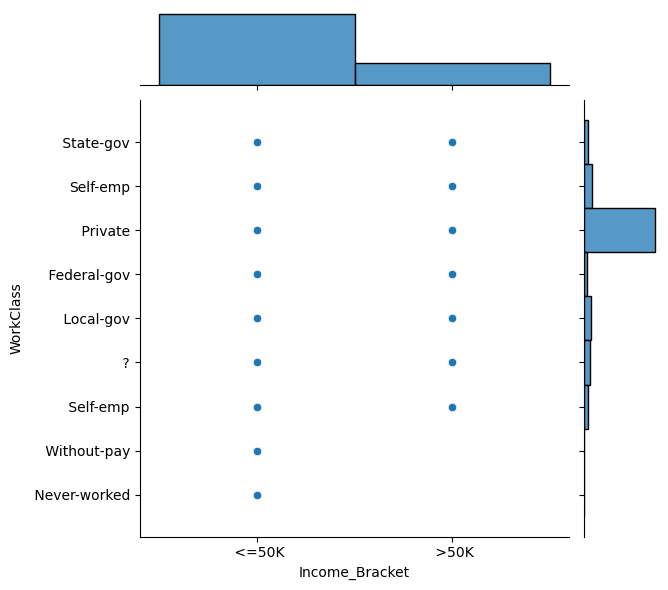

In [105]:
##bivariate analysis

sns.jointplot(y= 'WorkClass', x= 'Income_Bracket', data = income_data);

INTERPRETATION : most of the people who got income equal to less than 50k are from private workclass.

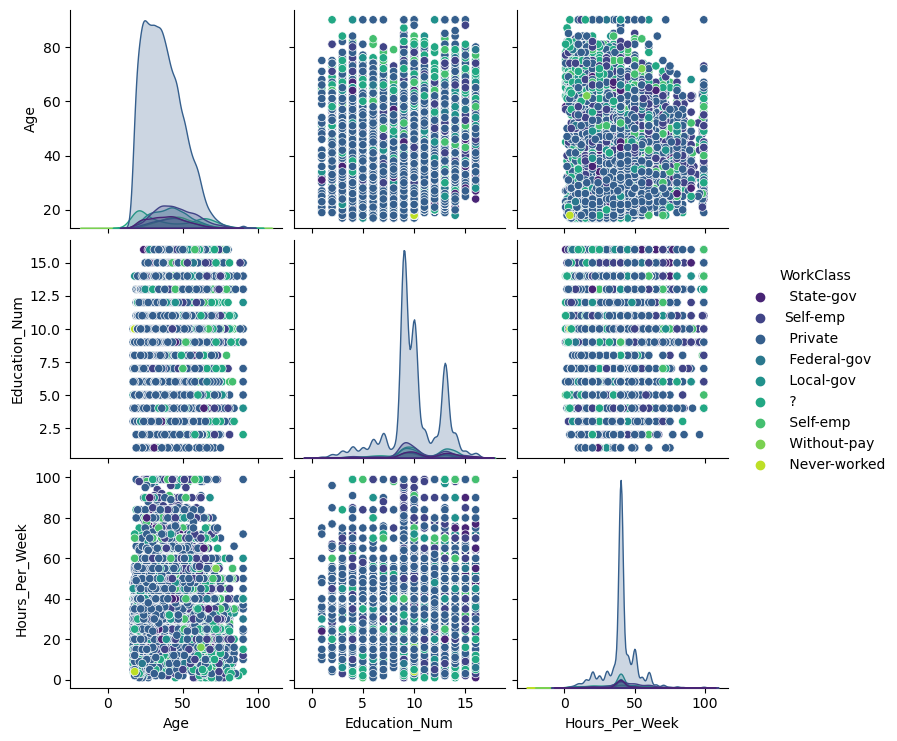

In [94]:
##multivariate analysis

sns.pairplot(income_data, hue = 'WorkClass', palette = 'viridis');

TASK 3

In [70]:
##TASK 3.1

#relationship of age with Income bracket

age = income_data[["Age","Income_Bracket"]]
age

Age Income_Bracket
0       39          <=50K
1       50          <=50K
2       38          <=50K
3       53          <=50K
4       28          <=50K
...    ...            ...
32556   27          <=50K
32557   40           >50K
32558   58          <=50K
32559   22          <=50K
32560   52           >50K

[32561 rows x 2 columns]

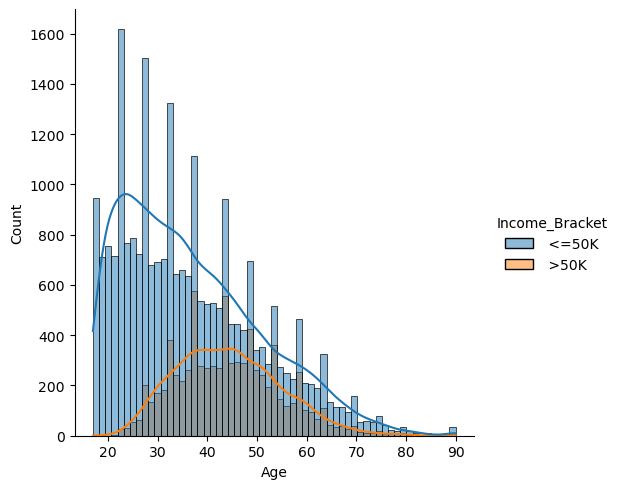

In [109]:
##bivariate analysis

ax = sns.displot(x=age["Age"],hue=age["Income_Bracket"],kde = True)

INTERPRETATION : Most of the people who earns income less than or equal to 50k are of age group 22-28.

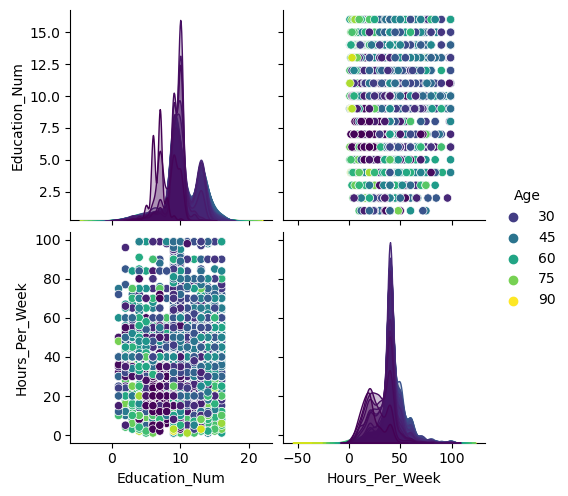

In [95]:
##multivariate analysis

sns.pairplot(income_data, hue = 'Age', palette = 'viridis');

In [72]:
##TASK 3.2

#relationship of Hours_Per_Week with Income bracket

hrs = income_data[["Hours_Per_Week","Income_Bracket"]]
hrs

Hours_Per_Week Income_Bracket
0                  40          <=50K
1                  13          <=50K
2                  40          <=50K
3                  40          <=50K
4                  40          <=50K
...               ...            ...
32556              38          <=50K
32557              40           >50K
32558              40          <=50K
32559              20          <=50K
32560              40           >50K

[32561 rows x 2 columns]

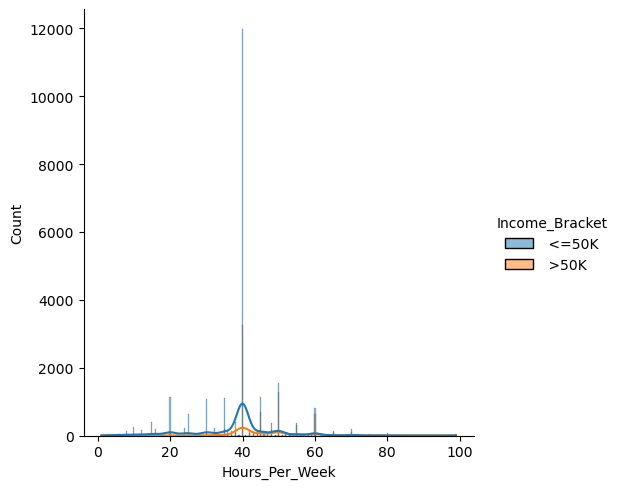

In [82]:
##bivariate analysis

sns.displot(x = hrs['Hours_Per_Week'], hue = hrs['Income_Bracket'], kde = True);

 INTERPRETATION : Most of the people who earns income less than or equal to 50k works 40rs/week.

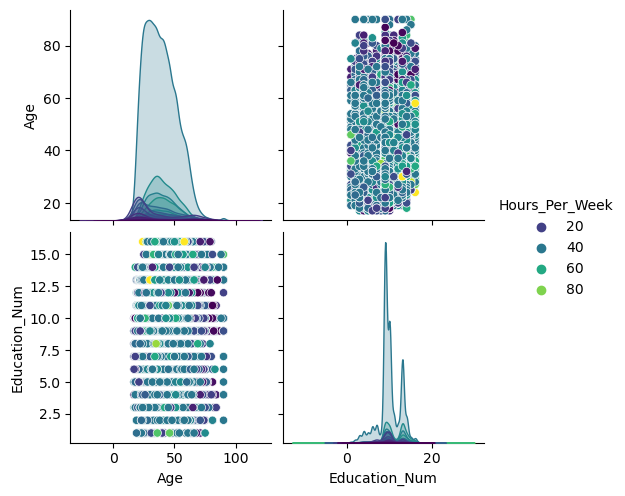

In [96]:
##multivariate analysis

sns.pairplot(income_data, hue = 'Hours_Per_Week', palette = 'viridis');